In [13]:
import numpy as np

# Load the stepping dataset
data = np.load('checkpoint_0002.npz')

# Display available keys
print("Available keys in the dataset:")
print(list(data.keys()))

# Load the data (example - adjust based on actual keys)
# Uncomment and modify based on the actual structure:
for key in data.keys():
    print(f"{key}: shape={data[key].shape}, dtype={data[key].dtype}")


Available keys in the dataset:
['q', 'qd', 'T_blf', 'T_brf', 'T_stsw', 'p_wcom', 'T_wbase', 'v_b', 'cmd_footstep', 'cmd_stance', 'cmd_countdown', 'traj', 'traj_dt']
q: shape=(413, 36), dtype=float64
qd: shape=(413, 35), dtype=float64
T_blf: shape=(413, 4), dtype=float64
T_brf: shape=(413, 4), dtype=float64
T_stsw: shape=(413, 4), dtype=float64
p_wcom: shape=(413, 3), dtype=float64
T_wbase: shape=(413, 7), dtype=float64
v_b: shape=(413, 6), dtype=float64
cmd_footstep: shape=(413, 4), dtype=float64
cmd_stance: shape=(413, 1), dtype=float64
cmd_countdown: shape=(413, 1), dtype=float64
traj: shape=(2,), dtype=int32
traj_dt: shape=(), dtype=float64


In [14]:
# Extract all data arrays from the loaded dataset
q = data['q']  # Joint positions: (781774, 36)
qd = data['qd']  # Joint velocities: (781774, 35)
T_blf = data['T_blf']  # Left front foot timing: (781774, 4)
T_brf = data['T_brf']  # Right front foot timing: (781774, 4)
T_stsw = data['T_stsw']  # Stance/swing timing: (781774, 4)
p_wcom = data['p_wcom']  # World COM position: (781774, 3)
T_wbase = data['T_wbase']  # World base transform: (781774, 7)
v_b = data['v_b']  # Base velocity: (781774, 6)
cmd_footstep = data['cmd_footstep']  # Footstep commands: (781774, 4)
cmd_stance = data['cmd_stance']  # Stance commands: (781774, 1)
cmd_countdown = data['cmd_countdown']  # Countdown commands: (781774, 1)
traj = data['traj']  # Trajectory indices: (4048,)
traj_dt = data['traj_dt']  # Trajectory time step: scalar

# Display summary
print(f"Dataset summary:")
print(f"  Total timesteps: {len(q)}")
print(f"  Number of trajectories: {len(traj)}")
print(f"  Trajectory time step: {traj_dt}")
print(f"  Joint positions (q): {q.shape}")
print(f"  Joint velocities (qd): {qd.shape}")


Dataset summary:
  Total timesteps: 413
  Number of trajectories: 2
  Trajectory time step: 0.02
  Joint positions (q): (413, 36)
  Joint velocities (qd): (413, 35)


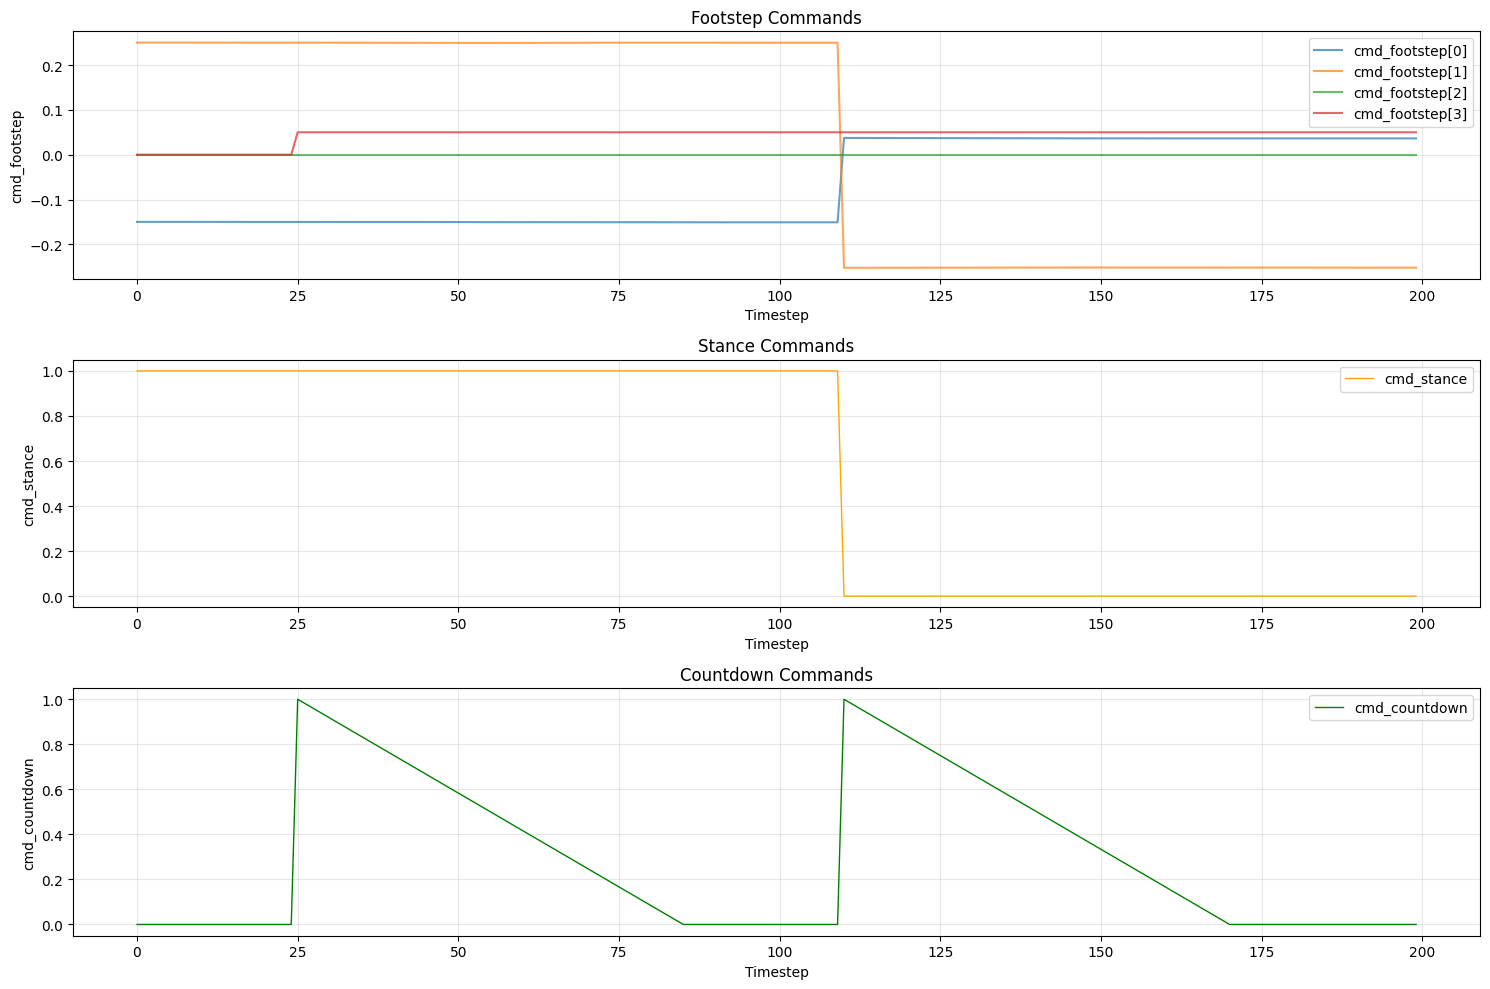


First 200 timesteps:

cmd_footstep (first 200 timesteps):
[[-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25        0.          0.        ]
 [-0.14981254  0.25    

In [15]:
import matplotlib.pyplot as plt

# Create timestep array
timesteps = np.arange(len(cmd_footstep))

# Option to plot subset (set to None to plot all, or specify max_timesteps)
max_timesteps = 200  # Plot first 200 timesteps

if max_timesteps is not None:
    end_idx = min(max_timesteps, len(timesteps))
    timesteps = timesteps[:end_idx]
    cmd_footstep_plot = cmd_footstep[:end_idx]
    cmd_stance_plot = cmd_stance[:end_idx].squeeze()
    cmd_countdown_plot = cmd_countdown[:end_idx].squeeze()
else:
    cmd_footstep_plot = cmd_footstep
    cmd_stance_plot = cmd_stance.squeeze()
    cmd_countdown_plot = cmd_countdown.squeeze()

# Create figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Plot cmd_footstep (4 components)
ax = axes[0]
for i in range(cmd_footstep_plot.shape[1]):
    ax.plot(timesteps, cmd_footstep_plot[:, i], label=f'cmd_footstep[{i}]', alpha=0.7)
ax.set_xlabel('Timestep')
ax.set_ylabel('cmd_footstep')
ax.set_title('Footstep Commands')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot cmd_stance
ax = axes[1]
ax.plot(timesteps, cmd_stance_plot, label='cmd_stance', color='orange', linewidth=1)
ax.set_xlabel('Timestep')
ax.set_ylabel('cmd_stance')
ax.set_title('Stance Commands')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot cmd_countdown
ax = axes[2]
ax.plot(timesteps, cmd_countdown_plot, label='cmd_countdown', color='green', linewidth=1)
ax.set_xlabel('Timestep')
ax.set_ylabel('cmd_countdown')
ax.set_title('Countdown Commands')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print first 200 timesteps
print(f"\nFirst 200 timesteps:")
print(f"\ncmd_footstep (first 200 timesteps):")
print(cmd_footstep[:200])
print(f"\ncmd_stance (first 200 timesteps):")
print(cmd_stance[:200].squeeze())
print(f"\ncmd_countdown (first 200 timesteps):")
print(cmd_countdown[:200].squeeze())

# Print some statistics
print(f"\nStatistics:")
print(f"cmd_footstep - shape: {cmd_footstep.shape}, min: {cmd_footstep.min():.4f}, max: {cmd_footstep.max():.4f}")
print(f"cmd_stance - shape: {cmd_stance.shape}, min: {cmd_stance.min():.4f}, max: {cmd_stance.max():.4f}")
print(f"cmd_countdown - shape: {cmd_countdown.shape}, min: {cmd_countdown.min():.4f}, max: {cmd_countdown.max():.4f}")
